<div align='center'><font size="5" color='#353B47'>Survival Analysis</font></div>
<div align='center'><font size="4" color="#353B47">Cox Model implementation</font></div>
<br>
<hr>

## <div id="summary">Table of contents</div>

**<font size="2"><a href="#chap1">1. Data description</a></font>**
**<br><font size="2"><a href="#chap2">2. The Kaplan Meier Estimator</a></font>**
**<br><font size="2"><a href="#chap3">3. Cox Proportional Hazards model</a></font>**
**<br><font size="2"><a href="#chap4">4. Example of survival curve</a></font>**

In [1]:
# Import dependancies
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

!pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

%matplotlib inline

     |████████████████████████████████| 358kB 628kB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


# <div id="chap1">Data description</div>

* Age: Age of patient at time of operation 
* Operation_year: Patient's year of operation (year - 19XX)
* Nb_pos_detected: Number of positive axillary nodes detected
* Surv: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [2]:
data = pd.read_csv('../input/habermans-survival-data-set/haberman.csv', names = ['Age','Operation_year','Nb_pos_detected','Surv'])
data.head(5)

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### <font color ='#D2911C'>Panda Profiling</font>

<div align='justify'><font size=3>Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince you to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.</font></div>

In [3]:
pandas_profiling.ProfileReport(data)

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.6 KiB
Average record size in memory,32.3 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### <font color ='#D2911C'>Survival Analysis</font>

<div align='justify'><font size=3>The survival analysis is based on the probability that the event of interest has not occurred at time t. A Survival function depending on time $S(t)$ is generally used to represent that probability.</font></div>
<br>
<font color ='#ff4f4f'>$$S(t) = P(T>t)$$</font>
<br>
<div align='justify'><font size=3>In other words, <font color ='#ff4f4f'>$S(t)$</font> corresponds to the probability of survival after time <font color ='#ff4f4f'>$t$</font>. Here, <font color ='#ff4f4f'>$T$</font> corresponds to the random lifetime taken from the population. Note that $S(t)$ is between zero and one (inclusive), and $S(t)$ is a decreasing function of $t$.</font></div>

### <font color ='#D2911C'>The Hazard Function</font>

<div align='justify'><font size=3>The Hazard Function, is defined as <font color ='#ff4f4f'>the probability that the subject will experience an event of interest within a small time interval, provided that the individual has survived until the beginning of that interval</font>. It is the instantaneous rate calculated over a time period and this rate is considered constant. It can also be considered as the risk of experiencing the event of interest at time t. It is the number of subjects experiencing an event in the interval beginning at time t divided by the product of the number of subjects surviving at time t and interval width. Since the probability of a continuous random variable to equal a particular value is zero. That’s why we consider the probability of the event happening at a particular interval of time from T till $(T + \Delta T)$. Since our goal is to find the risk of an event and we don’t want the risk to get bigger as the time interval $\Delta T$ gets bigger. Thus, in order to adjust for that, we divide the equation by $\Delta T$. This scales the equation by $\Delta T$. The equation of the Hazard Rate is given as:</font></div>
<br>
<font color ='#ff4f4f'>$$h(t) = \lim_{\delta t \to 0} \frac{Pr(t \leq T  \leq t + \delta t | T > t)}{\delta t}$$</font>
<br>
<div align='justify'><font size=3>The limit $\Delta T$ approaches zero implies that our goal is to measure the risk of an event happening at a particular point in time. So, taking the limit $\Delta T$ approaches zero yields an infinitesimally small period of time. One thing to point out here is that the Hazard is not a probability. This is because, even though we have the probability in the numerator, but the $\Delta T$ in the denominator could result in a value which is greater than one.</font></div>

### <font color ='#D2911C'>Censored Data</font>

<div align='justify'><font size=3>Observations are called censored when the information about their survival time is imcomplete. This happens when the subject is no longer observed before he/she experience the event of interest. This can be due either to the end of the observation period or to the occurrence of an other event preventing the observation of the event of interest. In an insurance context, lapsing leads to censored information when the event of interest is whatever mortality/morbidity risk. It is called right censored data. There are also left censored, interval censoring and left truncation but we will only work with right censored data. For example, someone who drops out of the study before the end of the study observation time and did not experience the event is said to be right censored.</font></div>

<div align="center">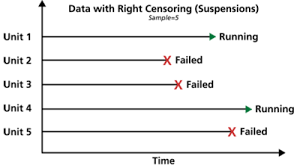</div>
<br>
<div align='center'><font size=3>On this illustration, Unit 1 and Unit 4 have not experienced the event before the end of the study.</font></div>

# <div id="chap2">The Kaplan Meier Estimator</div>

<div align='justify'><font size=3>The Kaplan-Meier estimator is used to estimate the survival function. It measures the fraction of subjects who survived for a certain amount of survival time $t$. Before using KM estimate in survival analysis, three assumptions must be made:
<br>
<br>1. Subjects that are censored have the <font color ='#ff4f4f'>same survival prospects as those who continue to be followed</font>.
<br>2. <font color ='#ff4f4f'>Survival probability is the same for all the subjects</font>, irrespective of when they are recruited in the study.
<br>3. <font color ='#ff4f4f'>The event of interest happens at the specified time</font>. This is because the event can happen between two examinations. The estimated survival time can be more accurately measured if the examination happens frequently i.e if the time gap between examinations is very small.</font></div>

<div align='justify'><font size=3>The visual representation of this function is usually called the <font color ='#ff4f4f'>Kaplan-Meier curve</font>. It shows the probability of an event at a certain time interval (For instance, survival). If the sample size is large enough, the curve should approach the true survival function for the population studied. The survival probability at any particular time is calculated as the number of subjects surviving divided by the number of people at risk. The censored subjects are not counted in the denominator. The equation is given as follows:
<br>
<br>
<font color ='#ff4f4f'>$$S(t) = \prod_{t_i,t} \frac{n_i - d_i}{n_i}$$</font>
<br>
$n_i$ represents the number of subjects at risk prior to time $t$. $d_i$ represents the number of the event of interest at time $t$.</font></div>

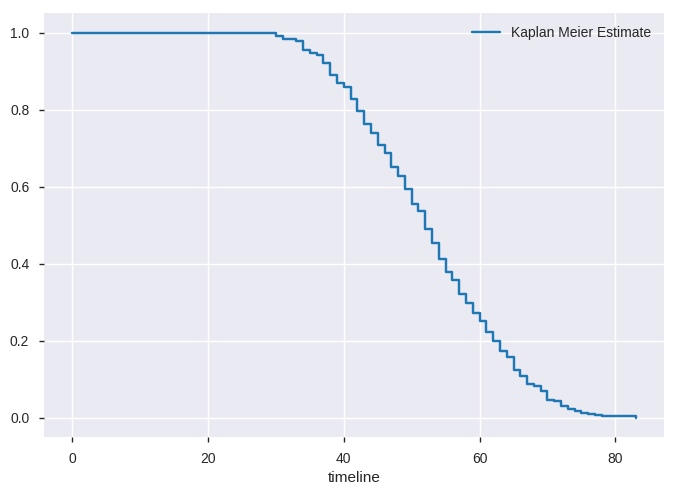

In [4]:
T = data.Age
E = data.Surv

## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

<div align='justify'><font size=3>the y-axis represents the probability the subject still hasn’t experienced the event of interest after time $t$, where time $t$ is on the x-axis. In order to see how uncertain we are about the point estimates, we use the confidence intervals. The median time is the time where on average, half of the population has experienced the event of interest.</font></div>

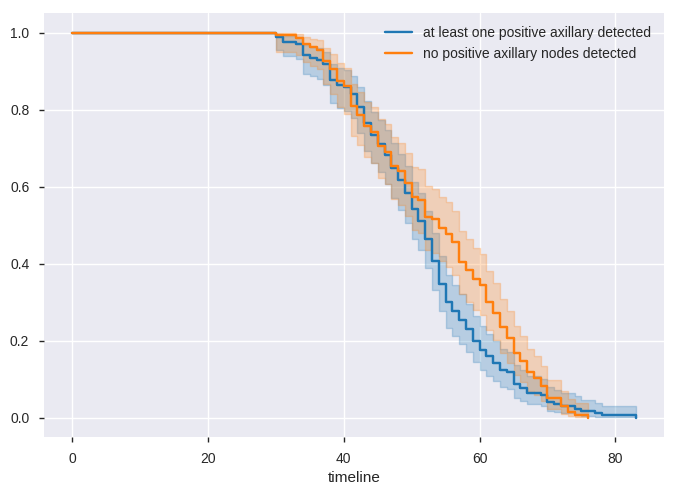

In [5]:
## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = data['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='at least one positive axillary detected')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1)

<div align='justify'><font size=3>There are two survival curves, one for each cohort. From the curves, it is evident that patients, who have undergone at least 1 surgery, are more likely to die sooner. Before 45 years old, the two curves are almost overlapped. At any point t>45 across the timeline, we can see that the survival probability of the cohort in blue is less than the cohort in red.</font></div>

# <div id="chap3">Cox Proportional Hazards model</div>

### <font color ='#D2911C'>Survival regression</font>

<div align='justify'><font size=3>Survival Regression does not only involves using the duration and the censorship variables but also using the additional features as covariates. We ‘regress’ these covariates with the duration variable. The dataset used for Survival Regression needs to be in the form of a DataFrame with a column denoting the duration the subjects, a column indicating whether or not the event of interest was observed, as well as additional covariates you need to regress with. Like with other regression techniques, you need to prepare the data before feeding it to the model.

### <font color ='#D2911C'>Cox Model</font>

<div align='justify'><font size=3>The Cox Proportional Hazards Model was introduced by Cox and it takes into account the effect of several variables at a time and examines the relationship of the survival distribution to these variables. It is similar to Multiple Regression Analysis, but the difference is that the depended variable is the Hazard Function at a given time t. It is based on very small intervals of time, which contains at most one event of interest. It is a semi-parametric approach for the estimation of weights in a Proportional Hazard Model. The parameter estimates are obtained by maximizing the partial likelihood of the weights. Gradient Descent is used to fit the Cox Model to the data. The explanation of Gradient Descent finds the weights such that the error is minimized. The formula for the Cox Proportional Hazards Regression Model is given as follows. The model works such that the log-hazard of an individual subject is a linear function of their static covariates and a population-level baseline hazard function that changes over time. These covariates can be estimated by partial likelihood.</font></div>
<br>
<br>
<font color ='#ff4f4f'>$$h(t|x) = b_0(t)\exp{\sum_{i=1}^{n} b_i(x_i)}$$</font>
<br>
<br><div align='justify'><font size=3>- <font color ='#ff4f4f'>$t$</font> represents the survival time, the hazard may vary over time.</font></div>
<br><div align='justify'><font size=3>- <font color ='#ff4f4f'>$h(t)$</font> is the hazard function determined by a set of $n$ covariates $(x_1, x_2,..., x_n)$.</font></div>
<br><div align='justify'><font size=3>- <font color ='#ff4f4f'>$b_0(t)$</font> is the baseline hazard function and it is defined as the probability of experiencing the event of interest when all other covariates equal zero. the value of the hazard if all the $x_i$ are equal to zero (the quantity $exp(0)$ equals $1$). It is the only time-dependent component in the model. The model makes no assumption about the baseline hazard function and assumes a parametric form for the effect of the covariates on the hazard.</font></div>
<br><div align='justify'><font size=3>- <font color ='#ff4f4f'>$\exp{\sum_{i=1}^{n} b_i(x_i)}$</font> is the partial hazard is a time-invariant scalar factor that only increases or decreases the baseline hazard. It is similar to the intercept in ordinary regression. The covariates or the regression coefficients x give the proportional change that can be expected in the hazard.</font></div>
<br><div align='justify'><font size=3>- the coefficients <font color ='#ff4f4f'>$(b_1, b_2,..., b_n)$</font> measure the impact (i.e., the effect size) of covariates.</font></div>
<br>
<br>
<div align='justify'><font size=3>The sign of the regression coefficients, <font color ='#ff4f4f'>$b_i$</font>, plays a role in the hazard of a subject. A change in these regression coefficients or covariates will either increase or decrease the baseline hazard. A positive sign for $b_i$ means that the risk of an event is higher, and thus the probability for the event of interest for that particular subject is higher. Similarly, a negative sign means that the risk of the event is lower. Also, note that the magnitude, i.e the value itself plays a role as well. For example, for the value of a variable equaling to one would mean that it’ll have no effect on the Hazard. For a value less than one, it’ll reduce the Hazard and for a value greater than one, it’ll increase the Hazard. These regression coefficients, $b$, are estimated by maximizing the partial likelihood.</font></div>
<br>
<div align='justify'><font size=3>Cox Proportional Hazards Model is a <font color ='#ff4f4f'>semi-parametric model</font> in the sense that the baseline hazard function does not have to be specified i.e it can vary, allowing a different parameter to be used for each unique survival time. But, it assumes that the rate ratio remains proportional throughout the studied period. This results in increased flexibility of the model. A fully-parametric proportional hazards model also assumes that the baseline hazard function can be parameterized according to a particular model for the distribution of the survival times. Cox Model can handle right-censored data but cannot handle left-censored or interval-censored data directly.</font></div>
<br>
<div align='justify'><font size=3>There are three assumptions made by the Cox Model:</font></div>
<br><div align='justify'><font size=3>1. The Hazard Ratio of two subjects remains <font color ='#ff4f4f'>the same</font> at all times.</font></div>
<div align='justify'><font size=3>2. The Explanatory Variables <font color ='#ff4f4f'>act multiplicatively</font> on the Hazard Function.</font></div>
<div align='justify'><font size=3>3. Failure times of individual subjects are <font color ='#ff4f4f'>independent</font> of each other.</font></div>

In [6]:
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(data, 'Age', event_col='Surv')

# Have a look at the significance of the features
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-08-25 09:02:13 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Operation_year   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Nb_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                    z    p   -log2(p)
covariate                            
Operation_year  -1.39 0.16       2.61
Nb_pos_detected  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

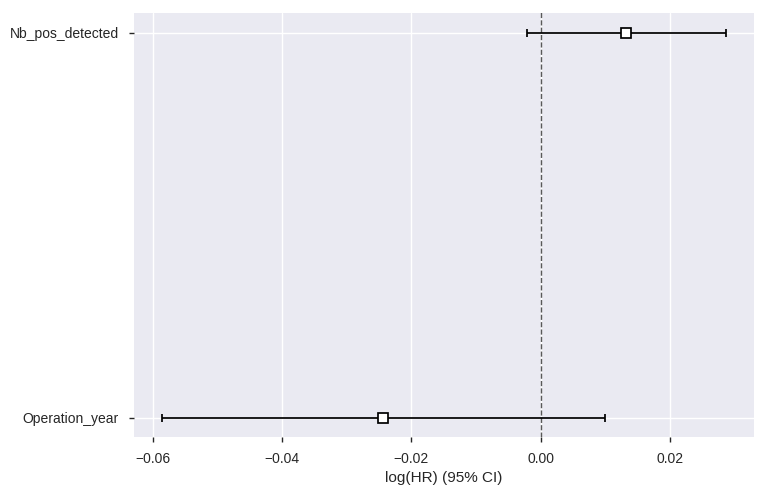

In [7]:
cph.plot()

<div align='justify'><font size=3>The summary statistics above indicates the significance of the covariates in predicting the Survival risk. both features play a tiny significant role in predicting the survival. The large CI indicates that more data are needed.</font></div>

# <div id="chap4">Example of a Survival Curve</div>

In [8]:
## I want to see the Survival curve at the patient level.
## Random patients
patients = [4,125,211]

rows_selected = data.iloc[patients, 1:3]
rows_selected

,Operation_year,Nb_pos_detected
4,65,4
125,64,0
211,67,0


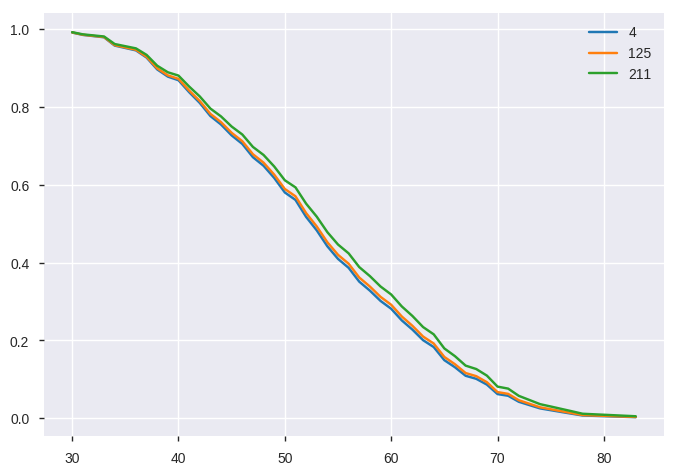

In [9]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()

<div align='justify'><font size=3>Shows the survival curves at customer level. It shows the survival curves for three randomly selected patients.</font></div>

<hr>
<br>
<div align='justify'><font color="#353B47" size="4">Thank you for taking the time to read this notebook. I hope that I was able to answer your questions or your curiosity and that it was quite understandable. <u>any constructive comments are welcome</u>. They help me progress and motivate me to share better quality content. I am above all a passionate person who tries to advance my knowledge but also that of others. If you liked it, feel free to <u>upvote and share my work.</u> </font></div>
<br>
<div align='center'><font color="#353B47" size="3">Thank you and may passion guide you.</font></div>